# Heart Failure Prediction Project

## Introduction

Cardiovascular diseases, including heart failure, are leading causes of morbidity and mortality globally. Timely prediction and diagnosis of heart failure are critical for effective treatment and improving patient outcomes. This data science project aims to predict the occurrence of heart failure based on a variety of clinical features.

The dataset contains records of patients with various attributes that may be related to heart failure outcomes, including factors such as age, anemia, diabetes, high blood pressure, and more. The objective is to build a predictive model that can estimate the likelihood of a heart failure event, represented by the `DEATH_EVENT` column, based on the provided features.

## Dataset Overview

The dataset includes the following columns:
- **age**: Age of the patient
- **anaemia**: Whether the patient has anemia
- **creatinine_phosphokinase**: Level of the CPK enzyme in the blood
- **diabetes**: Whether the patient has diabetes
- **ejection_fraction**: Percentage of blood leaving the heart at each contraction
- **high_blood_pressure**: Whether the patient has high blood pressure
- **platelets**: Platelet count in the blood
- **serum_creatinine**: Level of serum creatinine in the blood
- **serum_sodium**: Level of serum sodium in the blood
- **sex**: Gender of the patient
- **smoking**: Whether the patient is a smoker
- **time**: Follow-up period in days
- **DEATH_EVENT**: Whether the patient experienced a heart failure event

## Project Objective

In this project, we will use machine learning algorithms to predict heart failure events based on the clinical features provided. We will evaluate the performance of different models and aim to develop a predictive tool that can assist healthcare professionals in identifying high-risk patients for early intervention.

The notebook will follow the typical steps of a data science workflow, including data exploration, preprocessing, model development, and evaluation of results.


## Loading,Cleaning and Exploratory Analysis

In [9]:
import pandas as pd

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
# Check for missing values in the dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

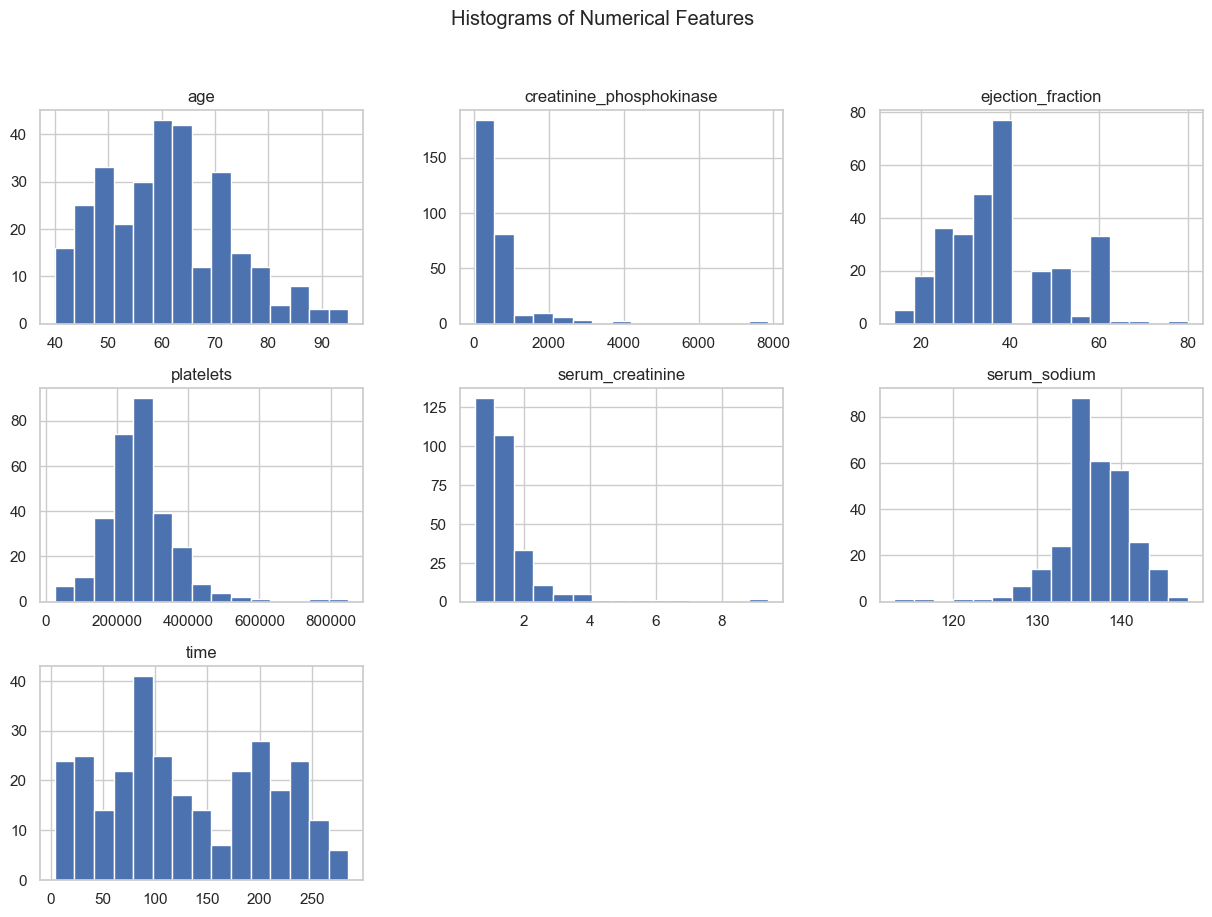

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Summary statistics of the dataset
summary_stats = df.describe()

# Plotting histograms for numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Display summary statistics
summary_stats

## Feature Engineering and Modeling 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Engineering: Separate features and target variable
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Determine the best model
best_model = max(results, key=results.get)
print("Best Model: " + best_model)

Logistic Regression Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

[[34  1]
 [11 14]]
Random Forest Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60

[[33  2]
 [14 11]]
Support Vector Machine Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                 

The best model based on accuracy is Logistic Regression with an accuracy of 80%. Best Model: Logistic Regression

## Overall Data Insights and Recommendations

### Model Performance
- The Logistic Regression model performed better than the Random Forest and SVM models.


### Recommendations
- Consider further feature engineering, such as creating interaction terms or using domain knowledge to create new features.
- Explore additional models or ensemble methods to improve performance.
- Investigate the data distribution and potential class imbalance, as the recall for the positive class (`DEATH_EVENT = 1`) is lower, indicating that the model may not be capturing this class as effectively.
